# Waze project
---

### PACE stages 
Plan, Analyze, Construct, and Execute.

### PACE: **Plan**

This project performed a **preliminary** inspection of Wazw data to inform the
team of key data variable descriptions, and ensure the information provided is suitable for generating clear
and meaningful insights.

- Explored dataset to find any unusual values.
- Considered which variables are most useful to build predictive models 
- Visualized the selected two variables to show potential interactions between them
- Examined which components of the provided data will provide relevant insights.
- Build the groundwork for future exploratory data analysis, visualizations, and models.


**The purpose** of this project is to investigate and understand the data provided. 

1.   Acquaint the data

2.   Compile summary information about the data

3.   Begin the process of EDA and reveal insights contained in the data

4.   Prepare you for more in-depth EDA, hypothesis testing, and statistical analysis

**The goal** is to construct a dataframe in Python, perform a cursory inspection of the provided dataset, and inform Waze data team members of your findings.

**PARTS**

**Part 1:** Understand the situation
* How can we best prepare to understand and organize the provided information?

**Part 2:** Understand the data

* Create a pandas dataframe for data learning and future exploratory data analysis (EDA) and statistical activities

* Compile summary information about the data to inform next steps

**Part 3:** Understand the variables

* Use insights from your examination of the summary data to guide deeper investigation into variables

---




**Part 1**:

The dataframe contains a collection of categorical, text, and numerical data. Each row represents a distinct feature taken in account by Waze.

The dataframe contains five float64s, three int64s, and four objects. There are 14,999 observations.

#### Variables:

**label** obj, Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month 

**sessions** int, The number of occurrence of a user opening the app during the month

**drives** int, An occurrence of driving at least 1 km during the month

**device** obj, The type of device a user starts a session with

**total_sessions** float, A model estimate of the total number of sessions since a user has onboarded

**n_days_after_onboarding** int, The number of days since a user signed up for the app

**total_navigations_fav1** int, Total navigations since onboarding to the user’s favorite place 1

**total_navigations_fav2** int, Total navigations since onboarding to the user’s favorite place 2

**driven_km_drives** float, Total kilometers driven during the month

**duration_minutes_drives** float, Total duration driven in minutes during the month

**activity_days** int, Number of days the user opens the app during the month 

**driving_days** int, Number of days the user drives (at least 1 km) during the month


## PACE: **Analyze**

In [2]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
## Defining a pandas data set and populating it with the data.
df =  pd.read_csv('waze_dataset.csv')

In [4]:
## Observing the first 10 examples
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [5]:
## Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


## Notes:
- `label` is missing 700 values
- Everything else seems to be good


Next we will compare statistics of the group that is missing data and the rest against the
one that is not missing anything.

- The descriptive statistics are not that different betweeen groups.

In [6]:
null_examples_group = df[df['label'].isnull()]
null_examples_group.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [7]:
NOT_null_examples_group = df[~df['label'].isnull()]
NOT_null_examples_group.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


### Android or iphone.
 `device` is and obj, and the type of device a user starts a session with
Calculating the value caounts for three groups.

In [14]:
## Missing group
NOT_null_examples_group['device'].value_counts(normalize=True)

iPhone     0.64515
Android    0.35485
Name: device, dtype: float64

In [12]:
## No missing group
null_examples_group['device'].value_counts(normalize=True)

iPhone     0.638571
Android    0.361429
Name: device, dtype: float64

In [15]:
## Full data group
df['device'].value_counts(normalize=True)

iPhone     0.644843
Android    0.355157
Name: device, dtype: float64

### Observing value counts of the label churned vs retained

In [16]:
df['label'].value_counts()

retained    11763
churned      2536
Name: label, dtype: int64

In [18]:
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

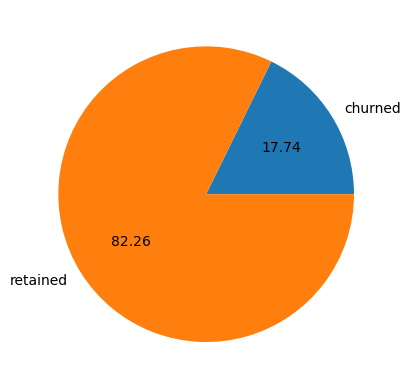

In [43]:
## Pie chart
df.groupby('label').size().plot(kind='pie', autopct='%.2f');

In [34]:
## Grouping the numerical columns and obtaining the 
## mean, rows churned and retained.
comparation = df.groupby('label').median(numeric_only=True)
comparation

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,diff
label,,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0,NaN
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0,NaN


In [36]:
## checking the differences betweeen the features
comparation.diff()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,diff
label,,,,,,,,,,,,
churned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retained,31.5,-3.0,-3.0,-6.752286,522.0,-16.5,-2.0,-187.971052,-149.137644,9.0,8.0,NaN


Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile.

In [32]:
## Median kilometers per drive in the last month for both retained and churned users.
comparation['driven_km_drives'] / comparation['drives']

label
churned     73.053113
retained    73.716694
dtype: float64

In [37]:
## Median kl per driving day:
comparation['driven_km_drives'] / comparation['driving_days']

label
churned     608.775944
retained    247.477472
dtype: float64

In [38]:
## Median drive per driving days
comparation['drives'] / comparation['driving_days']

label
churned     8.333333
retained    3.357143
dtype: float64

The median user who churned drove 608 kilometers each day they drove last month, which is almost 250% the per-drive-day distance of retained users. 

The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! 

In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. 

It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

In [40]:
## Amount and type of the device per label 
df.groupby(['label', 'device']).size()


label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [41]:
# For each label, calculate the percentage of Android users and iPhone users
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: device, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

### **Task 3. Conclusion**

#### NOTES:

Recall, May Santer, asked you to share your findings with the data team in an executive summary. Consider the following questions as you prepare to write your summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. Did the data contain any missing values? How many, and which variables were affected? Was there a pattern to the missing data?

> *The dataset has 700 missing values in the `label` column. There was no obvious pattern to the missing values.*

2. What is a benefit of using the median value of a sample instead of the mean?

> *Mean is subject to the influence of outliers, while the median represents the middle value of the distribution regardless of any outlying values.*

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

> *Yes. For example, the median user who churned drove 608 kilometers each day they drove last month, which is almost 250% the per-drive-day distance of retained users. It would be helpful to know how this data was collected and if it represents a non-random sample of users.*

4. What percentage of the users in the dataset were Android users and what percentage were iPhone users?

> *Android users comprised approximately 36% of the sample, while iPhone users made up about 64%*

5. What were some distinguishing characteristics of users who churned vs. users who were retained?

> *Generally, users who churned drove farther and longer in fewer days than retained users. They also used the app about half as many times as retained users over the same period.*

6. Was there an appreciable difference in churn rate between iPhone users vs. Android users?

> *No. The churn rate for both iPhone and Android users was within one percentage point of each other. There is nothing suggestive of churn being correlated with device.*